In [57]:
import chardet

def get_encoding(file: str):
    f = open(file, 'rb')
    f.readline() # header
    rawdata = f.readline()
    return chardet.detect(rawdata)

print(get_encoding('OpenDataZNO2016/OpenData2016.csv'))
print(get_encoding('OpenDataZNO2017/OpenData2017.csv'))
print(get_encoding('OpenDataZNO2018/OpenData2018.csv'))
print(get_encoding('OpenDataZNO2019/Odata2019File.csv'))
print(get_encoding('OpenDataZNO2020/Odata2020File.csv'))

# Problem: different encodings used through

{'encoding': 'windows-1251', 'confidence': 0.8890907599564519, 'language': 'Russian'}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
{'encoding': 'windows-1251', 'confidence': 0.8696797469421775, 'language': 'Russian'}
{'encoding': 'windows-1251', 'confidence': 0.9105063392098842, 'language': 'Russian'}


In [58]:
import pandas as pd

def read_zno_data(file: str):
    return pd.read_csv(file, delimiter=';', encoding=get_encoding(file)['encoding'])

df16 = read_zno_data('OpenDataZNO2016/OpenData2016.csv')
df17 = read_zno_data('OpenDataZNO2017/OpenData2017.csv')
df18 = read_zno_data('OpenDataZNO2018/OpenData2018.csv')
df19 = read_zno_data('OpenDataZNO2019/Odata2019File.csv')
df20 = read_zno_data('OpenDataZNO2020/Odata2020File.csv')

print(df16.head(0))
print(df17.head(0))

# Problem: different heads (column names) through years

Empty DataFrame
Columns: [OutID, Birth, SexTypeName, Regname, AreaName, TerName, RegTypeName, EOName, EOTypeName, EORegName, EOAreaName, EOTerName, EOParent, UkrTest, UkrTestStatus, UkrBall100, UkrBall12, UkrPTName, UkrPTRegName, UkrPTAreaName, UkrPTTerName, HistTest, HistLang, HistTestStatus, HistBall100, HistBall12, HistPTName, HistPTRegName, HistPTAreaName, HistPTTerName, MathTest, MathLang, MathTestStatus, MathBall100, MathBall12, MathPTName, MathPTRegName, MathPTAreaName, MathPTTerName, PhysTest, PhysLang, PhysTestStatus, PhysBall100, PhysPTName, PhysPTRegName, PhysPTAreaName, PhysPTTerName, ChemTest, ChemLang, ChemTestStatus, ChemBall100, ChemPTName, ChemPTRegName, ChemPTAreaName, ChemPTTerName, BioTest, BioLang, BioTestStatus, BioBall100, BioPTName, BioPTRegName, BioPTAreaName, BioPTTerName, GeoTest, GeoLang, GeoTestStatus, GeoBall100, GeoPTName, GeoPTRegName, GeoPTAreaName, GeoPTTerName, EngTest, EngTestStatus, EngBall100, EngPTName, EngPTRegName, EngPTAreaName, EngPTTerName, F

In [59]:
balls = [
    'ukr',
    'hist',
    'math',
    'phys',
    'chem',
    'bio',
    'geo',
    'eng'
]
std_labels = [
    'region',
    'role',
    *balls,
]

labels16 = [
    'Regname',
    'RegTypeName',
    'UkrBall100',
    'HistBall100',
    'MathBall100',
    'PhysBall100',
    'ChemBall100',
    'BioBall100',
    'GeoBall100',
    'EngBall100'
]

labels17 = [
    'REGNAME',
    'REGTYPENAME',
    'UKRBALL100',
    'HISTBALL100',
    'MATHBALL100',
    'PHYSBALL100',
    'CHEMBALL100',
    'BIOBALL100',
    'GEOBALL100',
    'ENGBALL100'
]

labels18 = [
    'REGNAME',
    'REGTYPENAME',
    'UkrBall100',
    'histBall100',
    'mathBall100',
    'physBall100',
    'chemBall100',
    'bioBall100',
    'geoBall100',
    'engBall100'
]

labels19 = labels18
labels20 = labels18

# Rename heads to `std_labels` and keep only `std_labels` columns
std_df16 = df16.rename(columns=dict(zip(labels16, std_labels)))[std_labels]
std_df17 = df17.rename(columns=dict(zip(labels17, std_labels)))[std_labels]
std_df18 = df18.rename(columns=dict(zip(labels18, std_labels)))[std_labels]
std_df19 = df19.rename(columns=dict(zip(labels19, std_labels)))[std_labels]
std_df20 = df20.rename(columns=dict(zip(labels20, std_labels)))[std_labels]

print(std_df16.dtypes)
print(std_df17.dtypes)

std_df16.head()

# Problem: some of marks are present as strings

region    object
role      object
ukr       object
hist      object
math      object
phys      object
chem      object
bio       object
geo       object
eng       object
dtype: object
region     object
role       object
ukr       float64
hist      float64
math      float64
phys      float64
chem      float64
bio       float64
geo       float64
eng       float64
dtype: object


,region,role,ukr,hist,math,phys,chem,bio,geo,eng
0,Запорізька область,Випускник загальноосвітнього навчального закла...,"112,0","125,0",NaN,NaN,NaN,NaN,NaN,NaN
1,Хмельницька область,Випускник загальноосвітнього навчального закла...,"133,0","111,0",NaN,NaN,NaN,NaN,"0,0",NaN
2,Дніпропетровська область,Випускник минулих років,"149,0","128,0","125,0",NaN,NaN,NaN,NaN,NaN
3,Чернівецька область,Випускник загальноосвітнього навчального закла...,"160,0",NaN,"143,0","147,0",NaN,NaN,NaN,"132,0"
4,Миколаївська область,"Учень (слухач, студент) професійно-технічного,...","151,0","166,0","140,0",NaN,NaN,NaN,NaN,NaN


In [60]:
def stof_all_columns(df):
    '''
    Convert all `balls` columns to float
    '''
    for id in balls:
        df[id] = df[id].astype('str').apply(lambda x: x.replace(',', '.')).astype('float64')

# map(stof_all_columns, [std_df16, std_df17, std_df18, std_df19, std_df20])
stof_all_columns(std_df16)
stof_all_columns(std_df17)
stof_all_columns(std_df18)
stof_all_columns(std_df19)
stof_all_columns(std_df20)
std_df20.describe()

# Problem: zeroes as marks are present

,ukr,hist,math,phys,chem,bio,geo,eng
count,274454.000000,178642.000000,152047.000000,22217.000000,11100.000000,74382.000000,92901.000000,104965.000000
mean,132.157139,116.436348,120.859346,127.828735,127.102613,131.535546,132.427127,137.016301
std,47.338394,51.002774,52.435259,44.766740,49.950652,40.200646,39.996192,46.922655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,106.000000,107.000000,113.000000,110.000000,116.000000,115.000000,117.000000
50%,138.000000,126.000000,129.000000,132.000000,133.000000,133.000000,137.000000,146.000000
75%,164.000000,147.000000,155.000000,155.000000,160.000000,157.000000,158.000000,169.000000
max,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000


In [69]:
import numpy as np

std_df16.replace(0, np.nan, inplace=True)
std_df17.replace(0, np.nan, inplace=True)
std_df18.replace(0, np.nan, inplace=True)
std_df19.replace(0, np.nan, inplace=True)
std_df20.replace(0, np.nan, inplace=True)

# drop rows with all `balls` equal nan
std_df16 = std_df16[std_df16[balls].isnull().all(1) == False]
std_df17 = std_df17[std_df17[balls].isnull().all(1) == False]
std_df18 = std_df18[std_df18[balls].isnull().all(1) == False]
std_df19 = std_df19[std_df19[balls].isnull().all(1) == False]
std_df20 = std_df20[std_df20[balls].isnull().all(1) == False]

std_df20.describe()

,ukr,hist,math,phys,chem,bio,geo,eng
count,251929.000000,154814.000000,132734.000000,20517.000000,9974.000000,70301.000000,87756.000000,97303.000000
mean,143.973324,134.357500,138.444566,138.420383,141.451674,139.171235,140.191127,147.805474
std,27.204107,24.368051,26.737859,26.532063,27.328933,25.440611,24.597313,27.935551
min,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
25%,121.000000,113.000000,114.000000,116.000000,119.000000,118.000000,119.000000,124.000000
50%,142.000000,132.000000,134.000000,135.000000,139.000000,136.000000,139.000000,149.000000
75%,166.000000,152.000000,160.000000,157.000000,164.000000,158.000000,160.000000,171.000000
max,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000


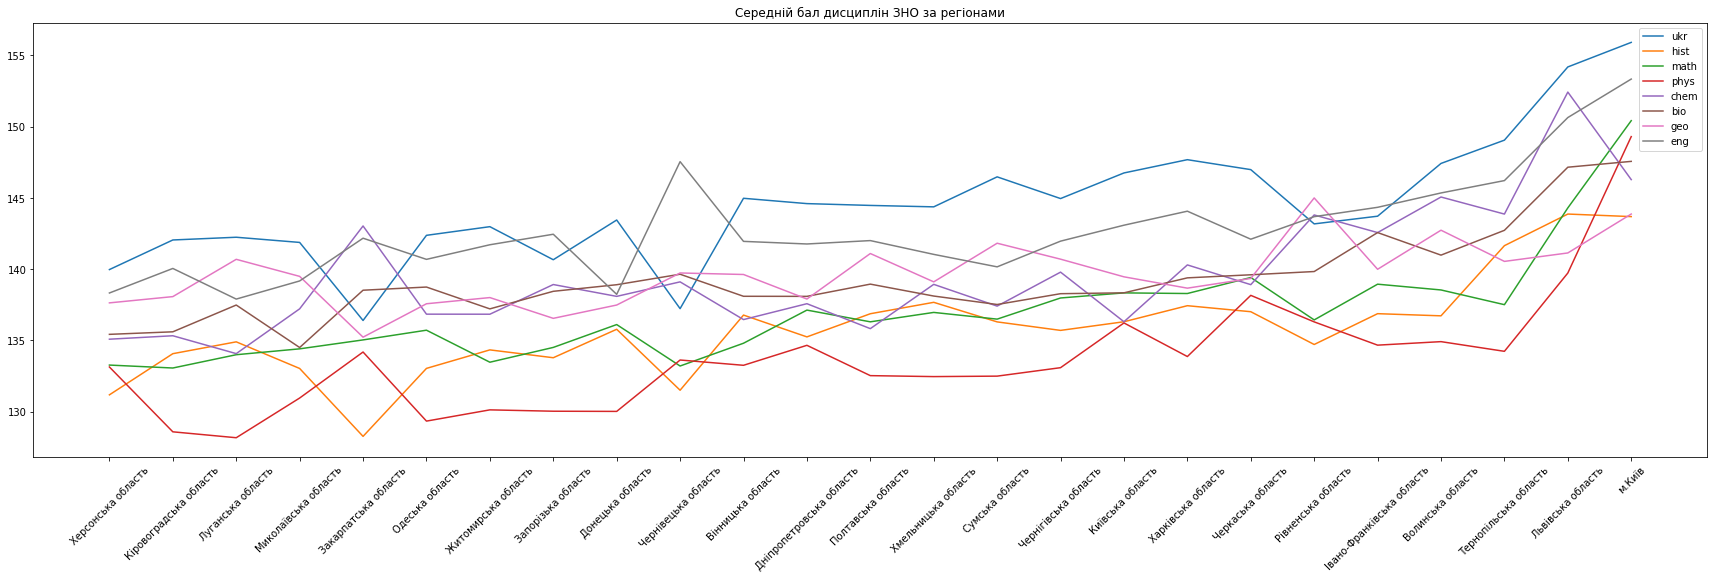

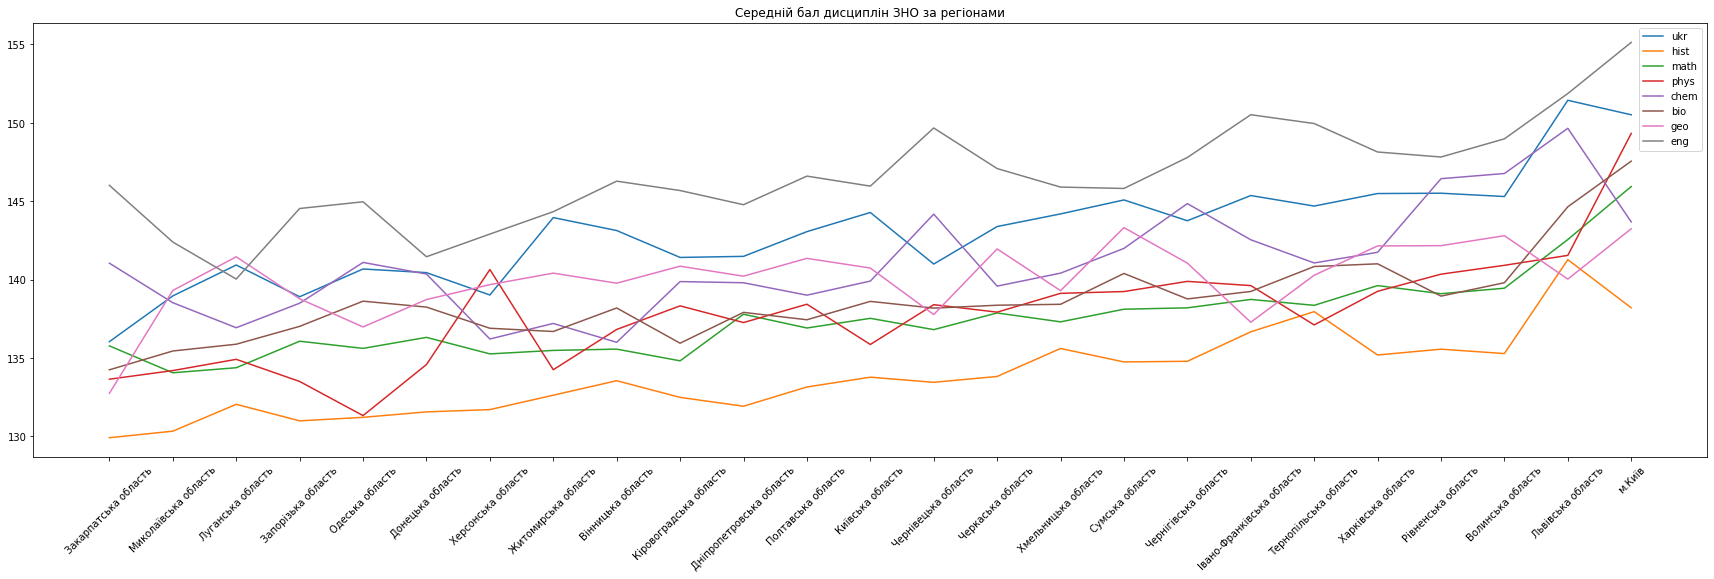

In [62]:
import matplotlib.pyplot as plt

def plot_mean_by_region(df):
    grpd_df = df.groupby(df.region).mean()
    # add avg columns
    grpd_df['avg'] = grpd_df.mean(numeric_only=True, axis=1)
    # sort by avg and delete
    grpd_df = grpd_df.sort_values(by='avg').reset_index().drop(columns='avg')
    grpd_df.plot(figsize=(30,8), title='Середній бал дисциплін ЗНО за регіонами')
    plt.xticks(grpd_df.index, grpd_df.region, rotation=45)

plot_mean_by_region(std_df16)
plot_mean_by_region(std_df20)

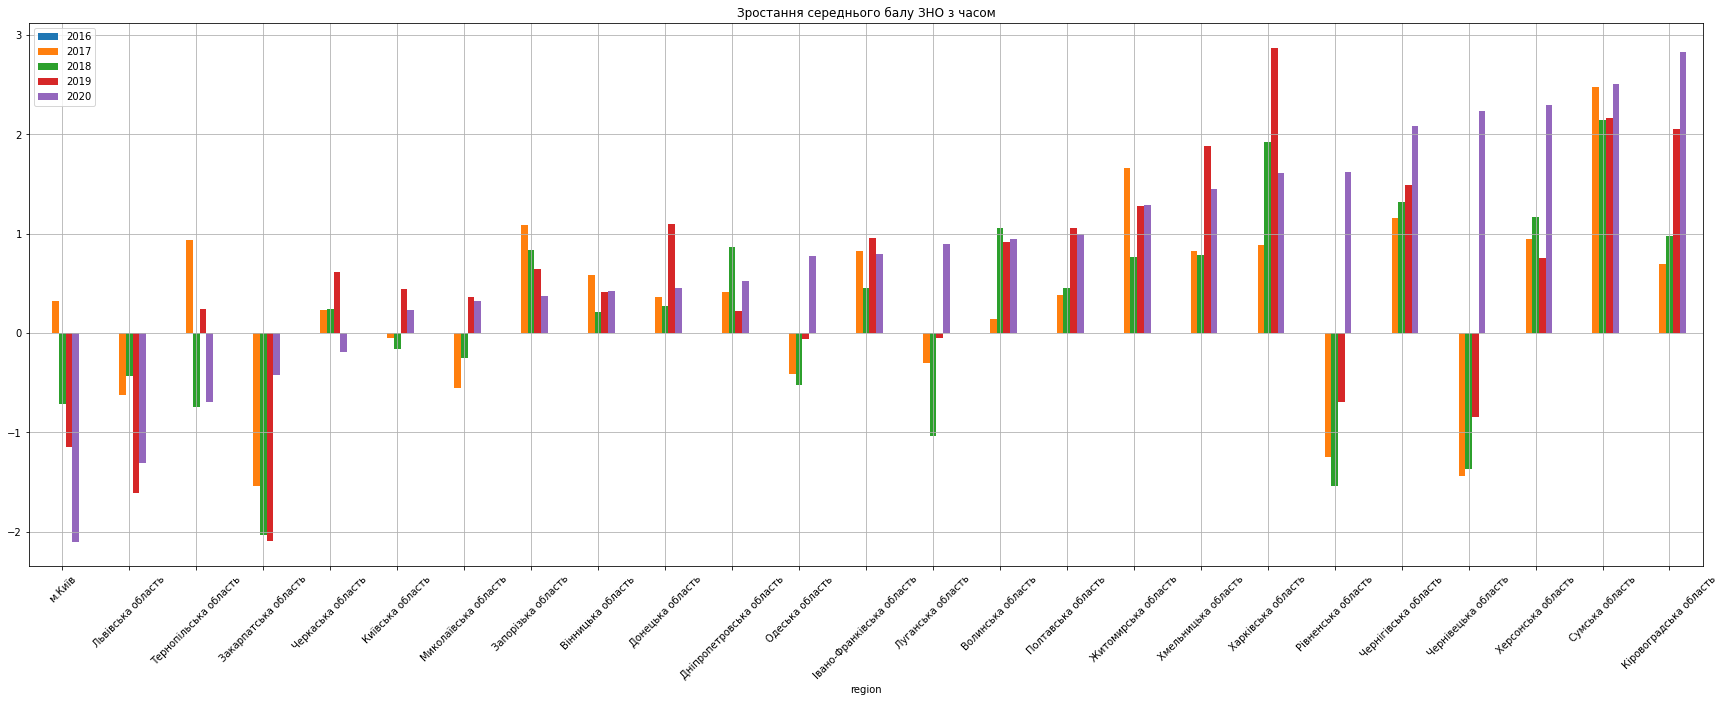

In [63]:
def mean_by_df(df, year):
    tmp = df.groupby(df.region).mean()
    tmp[year] = tmp.mean(numeric_only=True, axis=1)
    return tmp[year]

mean_by_year = pd.concat([
    mean_by_df(std_df16, '2016'),
    mean_by_df(std_df17, '2017'),
    mean_by_df(std_df18, '2018'),
    mean_by_df(std_df19, '2019'),
    mean_by_df(std_df20, '2020')
], axis=1, sort=False)

nrmlzd = mean_by_year.sub(mean_by_year['2016'], axis=0)
nrmlzd = nrmlzd.sort_values(by='2020')
r = nrmlzd.plot(figsize=(30,10), kind='bar', rot=45, grid=True, title='Зростання середнього балу ЗНО з часом')


In [64]:
def count_by_role(df, year):
    tmp = df.groupby(df.role).count()
    tmp = tmp.rename(columns={'region': year}, index={
        'Випускник загальноосвітнього навчального закладу %s року' % year : 'Випускник поточного року',
        'Випускник закладу загальної середньої освіти %s року' % year     : 'Випускник поточного року',
        'випускник закладу загальної середньої освіти %s року' % year     : 'Випускник поточного року'})
    return tmp.loc[['Випускник минулих років', 'Випускник поточного року'], year]

count_by_year = pd.concat([
    count_by_role(std_df16, '2016'),
    count_by_role(std_df17, '2017'),
    count_by_role(std_df18, '2018'),
    count_by_role(std_df19, '2019'),
    count_by_role(std_df20, '2020')
], axis=1, sort=False)

count_by_year.div(count_by_year.sum())

,2016,2017,2018,2019,2020
role,,,,,
Випускник минулих років,0.168604,0.127196,0.112877,0.126229,0.142491
Випускник поточного року,0.831396,0.872804,0.887123,0.873771,0.857509


In [67]:
def count_subjects_by_role(df, year):
    tmp = df.groupby(df.role).count()
    tmp = tmp.rename(index={
        'Випускник загальноосвітнього навчального закладу %s року' % year : 'Випускник поточного року',
        'Випускник закладу загальної середньої освіти %s року' % year     : 'Випускник поточного року',
        'випускник закладу загальної середньої освіти %s року' % year     : 'Випускник поточного року'})
    return tmp.div(tmp.ukr, axis=0).loc[['Випускник минулих років', 'Випускник поточного року'], balls]

subjects_by_role = count_subjects_by_role(std_df20, '2020')
subjects_by_role

,ukr,hist,math,phys,chem,bio,geo,eng
role,,,,,,,,
Випускник минулих років,1.0,0.47593,0.423714,0.079929,0.047576,0.285281,0.180198,0.297467
Випускник поточного року,1.0,0.62207,0.553017,0.091352,0.044264,0.288917,0.381651,0.450361


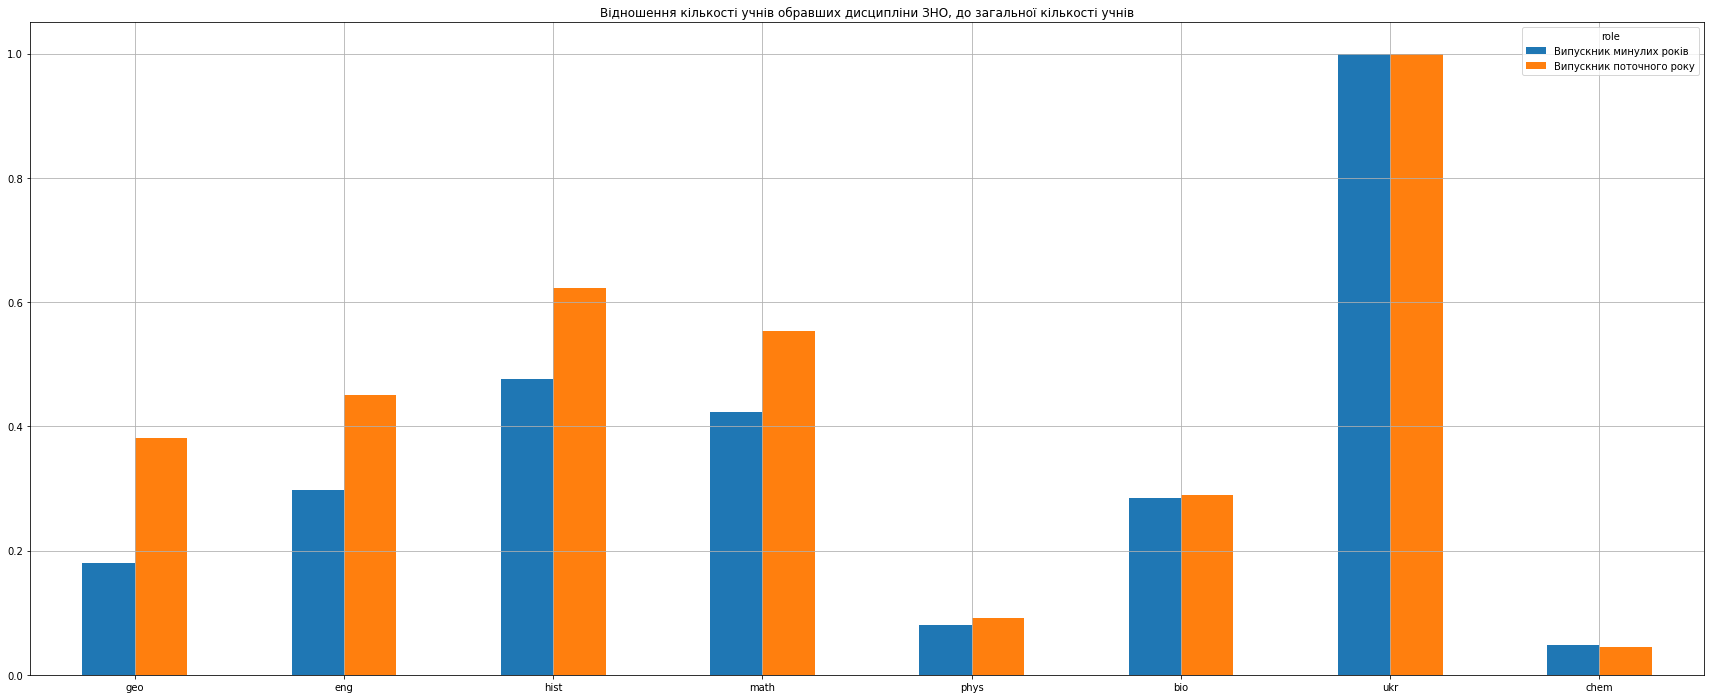

In [68]:
tmp = subjects_by_role.transpose()
tmp.insert(2, 'coef', (tmp['Випускник минулих років'] * 100).divide(tmp['Випускник поточного року'] * 100))
tmp = tmp.sort_values(by='coef').drop(columns='coef')
tmp
r = tmp.plot(figsize=(30,12), kind='bar', rot=0, grid=True, title='Відношення кількості учнів обравших дисципліни ЗНО, до загальної кількості учнів')